## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

df = pd.read_csv(url, header=None, names=column_headers,na_values='?')
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df = df.replace(to_replace='y', value=1).replace(to_replace='n', value =0)

In [11]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [21]:
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [0]:
def confidence_int(data, confidence=.95):
 data = np.array(data)
 mean = np.mean(data)
 n = len(data)
 stderr = np.std(data, ddof=1)/np.sqrt(n)
 moe=stderr * stats.t.ppf((1+ confidence)/2, n-1) #Just looking up the t-stat
 return(mean, mean-moe, mean+moe)

In [25]:
hand_inf = df[['party','handicapped-infants']]
hand_inf = hand_inf.dropna(axis=0)

dem_hand_inf = hand_inf[hand_inf['party']=='democrat']
rep_hand_inf = hand_inf[hand_inf['party']=='republican']

,party,handicapped-infants
0,republican,0.0
1,republican,0.0
7,republican,0.0
8,republican,0.0
10,republican,0.0


In [52]:
print(confidence_int(dem_hand_inf['handicapped-infants']))
print(confidence_int(rep_hand_inf['handicapped-infants']))

(0.6046511627906976, 0.5445926997425515, 0.6647096258388437)
(0.18787878787878787, 0.12765166444807918, 0.24810591130949655)


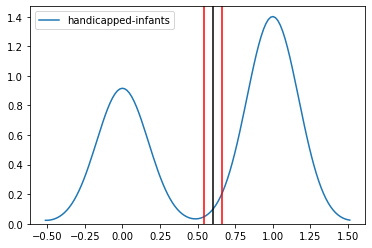

In [55]:
sns.kdeplot(dem_hand_inf['handicapped-infants'])
dem_CI= confidence_int(dem_hand_inf['handicapped-infants'])
plt.axvline(x=dem_CI[1], color = 'red');
plt.axvline(x=dem_CI[2], color = 'red');
plt.axvline(x=dem_CI[0], color = 'black');

The Democrats had a slight higher chance to vote for this particular bill, aka about 60% with a +/-6% confidence interval.

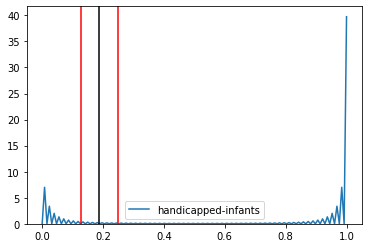

In [57]:
sns.kdeplot(rep_hand_inf['handicapped-infants'])
rep_CI= confidence_int(rep_hand_inf['handicapped-infants'])
plt.axvline(x=rep_CI[1], color = 'red');
plt.axvline(x=rep_CI[2], color = 'red');
plt.axvline(x=rep_CI[0], color = 'black');

In [59]:
url2 = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'
df2 = pd.read_csv(url2, na_values=' ?')
print(df2.shape)
df2.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [61]:
df2.describe

<bound method NDFrame.describe of        age          workclass  fnlwgt  ... hours-per-week         country  salary
0       39          State-gov   77516  ...             40   United-States   <=50K
1       50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
2       38            Private  215646  ...             40   United-States   <=50K
3       53            Private  234721  ...             40   United-States   <=50K
4       28            Private  338409  ...             40            Cuba   <=50K
...    ...                ...     ...  ...            ...             ...     ...
32556   27            Private  257302  ...             38   United-States   <=50K
32557   40            Private  154374  ...             40   United-States    >50K
32558   58            Private  151910  ...             40   United-States   <=50K
32559   22            Private  201490  ...             20   United-States   <=50K
32560   52       Self-emp-inc  287927  ...             40   Unit

In [62]:
df2.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [64]:
df2.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [63]:
df2['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [69]:
workclass_sex = df2[['workclass','sex']]
workclass_sex.isnull().sum()

workclass    1836
sex             0
dtype: int64

In [72]:
workclass_sex = df2[['workclass','sex']]
print(workclass_sex.shape)
workclass_sex = workclass_sex.dropna(axis=0)
print(workclass_sex.shape)
workclass_sex.isnull().sum()

(32561, 2)
(30725, 2)


workclass    0
sex          0
dtype: int64

In [75]:
chisquare(pd.crosstab(workclass_sex['sex'],workclass_sex['workclass']), axis = None)

Power_divergenceResult(statistic=121767.55889340927, pvalue=0.0)

In [83]:
workclass_sex.head()

,workclass,sex
0,State-gov,Male
1,Self-emp-not-inc,Male
2,Private,Male
3,Private,Male
4,Private,Female


In [77]:
pd.crosstab(workclass_sex['sex'],workclass_sex['workclass'])

workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
sex,,,,,,,,
Female,315,835,2,7752,135,399,489,5
Male,645,1258,5,14944,981,2142,809,9


In [0]:
expected_ij = workclass_sex[workclass_sex['sex']==' Female']

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)